In [1]:
# See if DCT performs better when the data is spread around 0, vs all positive.

In [2]:
import numpy as np

from PIL import Image, ImageFilter
from matplotlib import pylab as pylab
from matplotlib import pyplot as plt

from scipy.fft import dct, idct

# %matplotlib inline
pylab.rcParams['figure.figsize'] = (8, 8)

from pathlib import Path

image = 'coral'
size  = 1024

experiment = 'negative'

output = Path('outputs') / f'{image}-{size}'

output.mkdir(exist_ok=True, parents=True)

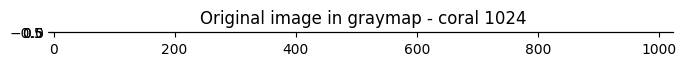

In [3]:
y, cb, cr = Image.open(f'../../images/{image}/{image}-{size}.png').convert('YCbCr').split()

im = np.array(y)
im = im[:im.shape[0] - im.shape[0]%8, :im.shape[1] - im.shape[1]%8]

im = im.astype(np.int64)

im = np.asmatrix(im[0][:2000])

plt.figure()
plt.imshow(im, cmap='gray')
plt.title(f"Original image in graymap - {image} {size}")

plt.imsave(f'{output}/original.png', im, cmap='gray')

In [4]:
imt = im.A1


dct_normal = dct(imt.reshape((im.size//8, 8)))
dct_127    = dct((imt - 127).reshape((im.size//8, 8)))
dct_mean   = dct((imt - np.mean(imt)).reshape((im.size//8, 8)))
dct_median = dct((imt - np.median(imt)).reshape((im.size//8, 8)))

In [5]:
def describe(arr):
    print("min: ", arr.min())
    print("max:", arr.max())
    print("range:", arr.max() - arr.min())
    print("mean:", np.mean(arr))
    print("median:", np.median(arr))
    print("abs sum:", abs(arr).sum())

In [6]:
describe(imt)

min:  25
max: 235
range: 210
mean: 100.48046875
median: 98.0
abs sum: 102892


In [7]:
describe(dct_normal)

min:  -545.5418921248556
max: 3444.0
range: 3989.5418921248556
mean: 201.9644264437955
median: 1.6559086384500625
abs sum: 250628.0490790723


In [8]:
describe(dct_127)

min:  -1616.0
max: 1412.0
range: 3028.0
mean: -52.03557355620448
median: -0.4168600955194228
abs sum: 146784.0490790723


In [9]:
describe(dct_mean)

min:  -1191.6875
max: 1836.3125
range: 3028.0
mean: 1.0034889437955208
median: 0.0
abs sum: 138968.0490790723


In [10]:
describe(dct_median)

min:  -1152.0
max: 1876.0
range: 3028.0
mean: 5.964426443795521
median: 0.0
abs sum: 139060.0490790723


In [11]:
unique, counts = np.unique(imt % 10, return_counts=True)

print(np.asarray((unique, counts)).T)

[[  0 117]
 [  1 133]
 [  2  95]
 [  3 107]
 [  4  90]
 [  5  85]
 [  6 117]
 [  7  76]
 [  8  97]
 [  9 107]]
